In [206]:
def parse_blocks(f):
    block = {}
    for i in range(len(f)):
        if f[i].find('Block') == 0:
            idx = f[i][:-1]
            block[idx] = []
            skip_one_row = 1
        elif skip_one_row == 1:
            skip_one_row = 0
        elif f[i][:3] == '---':
            continue
        else:
            block[idx].append(f[i].split('\t')[0])
    return block

In [207]:
f = open("5kb/blocks_coords.txt",)
f = f.readlines()
f = f[12:]
block_5kb = parse_blocks(f)

In [208]:
f = open("1kb/blocks_coords.txt",)
f = f.readlines()
f = f[12:]
block_1kb = parse_blocks(f)

In [209]:
#number of all blocks
len(block_5kb), len(block_1kb)

(156, 311)

In [210]:
def common_block(block):
    n = 0
    for i in range(1, len(block)+1):
        if len(set(block['Block #' + str(i)])) == 10:
            n += 1
    return n

In [211]:
#number of common blocks
common_block(block_5kb), common_block(block_1kb)

(138, 252)

In [212]:
def repeated_block(block):
    n = 0
    for i in range(1, len(block)+1):
        if len(set(block['Block #' + str(i)])) != len(block['Block #' + str(i)]):
            # print('Block #' + str(i))
            n += 1
    return n

In [213]:
#number of repeated blocks
repeated_block(block_5kb), repeated_block(block_1kb)

(2, 19)

In [214]:
def parse_blocks_length(f):
    block = {}
    for i in range(len(f)):
        if f[i].find('Block') == 0:
            idx = f[i][:-1]
            block[idx] = []
            skip_one_row = 1
        elif skip_one_row == 1:
            skip_one_row = 0
        elif f[i][:3] == '---':
            continue
        else:
            block[idx].append(int(f[i].split('\t')[4][:-1]))
    return block

In [215]:
block_1kb_len = parse_blocks_length(f)

In [216]:
for i in range(1, len(block_1kb_len)+1):
    block_1kb_len['Block #' + str(i)] = int(sum(block_1kb_len['Block #' + str(i)])/len(block_1kb_len['Block #' + str(i)]))

In [217]:
block_1kb_freq = {}
for i in range(1, len(block_1kb)+1):
    block_1kb_freq['Block #' + str(i)] = len(set(block_1kb['Block #' + str(i)]))

In [218]:
import matplotlib.pyplot as plt

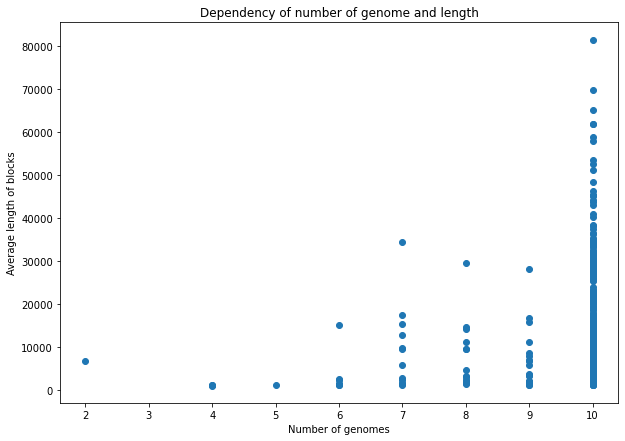

In [219]:
plt.figure(figsize=(10,7))
plt.scatter(list(block_1kb_freq.values()), list(block_1kb_len.values()))
plt.title('Dependency of number of genome and length')
plt.xlabel('Number of genomes')
plt.ylabel('Average length of blocks')
plt.show()

In [220]:
for k, v in block_1kb_freq.items():
    if v == 2:
        print(k)

block_1kb_len['Block #2']

Block #311


1315

In [221]:
for k, v in block_1kb_len.items():
    if v >= 80000:
        print(k)

Block #228


In [222]:
def parse_blocks_coord(f):
    block = {}
    for i in range(len(f)):
        if f[i].find('Block') == 0:
            idx = f[i][:-1]
            block[idx] = []
            skip_one_row = 1
        elif skip_one_row == 1:
            skip_one_row = 0
        elif f[i][:3] == '---':
            continue
        else:
            block[idx].append([int(f[i].split('\t')[0]), int(f[i].split('\t')[2]), int(f[i].split('\t')[3])])
    return block

In [223]:
block_1kb_coors = parse_blocks_coord(f)

In [224]:
block_1kb_coors['Block #311']

[[1, 1224112, 1230874], [8, 41383, 34621]]

In [228]:
block_1kb_coors['Block #228']

[[1, 4434761, 4353410],
 [2, 649267, 730814],
 [3, 3398111, 3479705],
 [4, 3805899, 3887447],
 [5, 150817, 232396],
 [6, 3674409, 3755901],
 [7, 1576388, 1657861],
 [8, 1987303, 2069408],
 [9, 3755283, 3836815],
 [10, 652667, 571091]]

In [225]:
from BCBio.GFF import GFFExaminer
import pprint
from Bio import SeqIO
from BCBio import GFF

In [226]:
in_handle = open('GCF_000022845.1_ASM2284v1_genomic.gff')
for rec in GFF.parse(in_handle):
    print(rec)
in_handle.close()

ID: NC_014017.1
Name: <unknown name>
Description: <unknown description>
Number of features: 90
/gff-version=['3']
/sequence-region=[('NC_014029.1', 0, 4553586), ('NC_014017.1', 0, 68342), ('NC_014022.1', 0, 94251), ('NC_014027.1', 0, 9609)]
/species=['https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=637386', 'https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=637386', 'https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=637386', 'https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=637386']
UnknownSeq(68587, character='?')
ID: NC_014022.1
Name: <unknown name>
Description: <unknown description>
Number of features: 97
/gff-version=['3']
/sequence-region=[('NC_014029.1', 0, 4553586), ('NC_014017.1', 0, 68342), ('NC_014022.1', 0, 94251), ('NC_014027.1', 0, 9609)]
/species=['https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=637386', 'https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=637386', 'https://www.ncbi.nlm.nih.gov/Taxonomy/Browse

In [232]:
for i in range(len(rec.features)):
    if rec.features[i].location.start > 34621 and rec.features[i].location.end < 41383 and rec.features[i].strand == -1:
        print(rec.features[i].qualifiers['Name'])

['YPZ3_RS00185']
['YPZ3_RS00190']


In [231]:
for i in range(len(rec.features)):
    if rec.features[i].location.start > 1987303 and rec.features[i].location.end < 2069408:
        print(rec.features[i].qualifiers['Name'])

['tpx']
['ycjG']
['mpaA']
['YPZ3_RS09125']
['zntB']
['YPZ3_RS09135']
['YPZ3_RS09140']
['ttcA']
['nifJ']
['YPZ3_RS09155']
['YPZ3_RS09160']
['YPZ3_RS09165']
['hslJ']
['YPZ3_RS09175']
['YPZ3_RS09180']
['YPZ3_RS09185']
['YPZ3_RS09190']
['YPZ3_RS09195']
['YPZ3_RS09200']
['azoR']
['hrpA']
['YPZ3_RS09215']
['YPZ3_RS09220']
['YPZ3_RS09225']
['asr']
['YPZ3_RS09240']
['YPZ3_RS09245']
['YPZ3_RS09250']
['YPZ3_RS09260']
['YPZ3_RS09270']
['YPZ3_RS09275']
['rstB']
['rstA']
['YPZ3_RS09290']
['YPZ3_RS09295']
['YPZ3_RS09300']
['pntA']
['pntB']
['uspE']
['YPZ3_RS09325']
['ogt']
['phoA']
['YPZ3_RS09340']
['YPZ3_RS09345']
['yjjG']
['ilvN']
['ilvB']
['ivbL']
['YPZ3_RS09365']
['YPZ3_RS09370']
['YPZ3_RS09375']
['YPZ3_RS09380']
['YPZ3_RS09385']
['YPZ3_RS22750']
['YPZ3_RS22755']
['YPZ3_RS09395']
['YPZ3_RS09400']
['clcB']
['bioD']
['YPZ3_RS09420']
['YPZ3_RS09425']
['YPZ3_RS09430']
['YPZ3_RS09435']
['fumC']


In [233]:
block_1kb_set = {}
for i in range(1, len(block_1kb)+1):
        block_1kb_set['Block #' + str(i)] = set(block_1kb['Block #' + str(i)])

In [234]:
from collections import defaultdict

In [235]:
gen_set = defaultdict(set)
for k, v in block_1kb_set.items():
    for g in v:
        gen_set[int(g)].add(k)

In [236]:
res = [[0 for _ in range(10)] for _ in range(10)]
for i in range(1, 11):
    for j in range(1, 11):
        res[i-1][j-1] = len(gen_set[i].intersection(gen_set[j]))

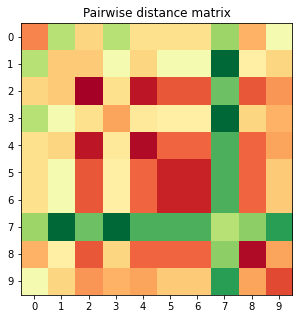

In [244]:
plt.figure(figsize=(5,5))
plt.imshow(res, cmap='RdYlGn_r', interpolation='nearest')
plt.title("Pairwise distance matrix")
plt.xticks(range(0,10))
plt.yticks(range(0,10))
plt
plt.show()

In [245]:
max_d = 0
max_g = []
for i in range(0,10):
    for j in range(0,10):
        if max_d < res[i][j] and i != j:
            max_d = res[i][j]
            max_g = [i, j]

In [246]:
max_g

[2, 4]

In [247]:
max_d

302